In [20]:
import pandas as pd

# DataFrame条件查询操作

## 加载scientists.csv数据集

In [21]:
scientists = pd.read_csv('./data/scientists.csv')
scientists

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


## 获取Age大于60且Age小于80的科学家信息

In [22]:
scientists.loc[(scientists.Age > 60)&(scientists.Age < 80)]

,Name,Born,Died,Age,Occupation
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician


# 2 DataFrame分组聚合操作

In [23]:
# 按照Occupation职业分组，并计算每组年龄的平均值
scientists.groupby('Occupation')['Age'].mean()

Occupation
Biologist             56.0
Chemist               51.5
Computer Scientist    41.0
Mathematician         77.0
Nurse                 90.0
Physician             45.0
Statistician          61.0
Name: Age, dtype: float64

In [24]:
scientists.groupby('Occupation').Age.mean()

Occupation
Biologist             56.0
Chemist               51.5
Computer Scientist    41.0
Mathematician         77.0
Nurse                 90.0
Physician             45.0
Statistician          61.0
Name: Age, dtype: float64

In [25]:
# 按照 Occupation 职业分组，并计算每组的人数和年龄的平均值
scientists.groupby('Occupation').agg({'Name':'count','Age':'mean'})

,Name,Age
Occupation,,
Biologist,1,56.0
Chemist,2,51.5
Computer Scientist,1,41.0
Mathematician,1,77.0
Nurse,1,90.0
Physician,1,45.0
Statistician,1,61.0


In [26]:
scientists.groupby('Occupation').aggregate({'Name':'count','Age':'mean'})

,Name,Age
Occupation,,
Biologist,1,56.0
Chemist,2,51.5
Computer Scientist,1,41.0
Mathematician,1,77.0
Nurse,1,90.0
Physician,1,45.0
Statistician,1,61.0


# 3 DataFrame排序操作

In [27]:
# 按照Age从小到大进行排序
scientists.sort_values('Age')

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
5,John Snow,1813-03-15,1858-06-16,45,Physician
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse


In [28]:
scientists.sort_values('Age',ascending=False)

,Name,Born,Died,Age,Occupation
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
5,John Snow,1813-03-15,1858-06-16,45,Physician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist


In [29]:
# 按照行标签从大到小排序
scientists.sort_index(ascending=False)

,Name,Born,Died,Age,Occupation
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
5,John Snow,1813-03-15,1858-06-16,45,Physician
4,Rachel Carson,1907-05-27,1964-04-14,56,Biologist
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
1,William Gosset,1876-06-13,1937-10-16,61,Statistician
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist


## Series 也可以使用 sort_values 和 sort_index 函数进行排序，只不过 Series 的 sort_values 方法没有 by 参数

In [30]:
# 按照Series数据的值进行排序
scientists['Age'].sort_values()

0    37
6    41
5    45
4    56
1    61
3    66
7    77
2    90
Name: Age, dtype: int64

In [31]:
# 按照Series数据的标签进行排序
scientists['Age'].sort_index()

0    37
1    61
2    90
3    66
4    56
5    45
6    41
7    77
Name: Age, dtype: int64

In [32]:
# 按照Series数据的标签进行排序（降序）
scientists['Age'].sort_index(ascending=False)

7    77
6    41
5    45
4    56
3    66
2    90
1    61
0    37
Name: Age, dtype: int64

# 4 nlargest 和 nsmallest 函数

In [33]:
# 获取Age最大的前三行数据
scientists.nlargest(3,columns='Age')

,Name,Born,Died,Age,Occupation
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist


In [34]:
scientists.sort_values('Age',ascending=False).head(3)

,Name,Born,Died,Age,Occupation
2,Florence Nightingale,1820-05-12,1910-08-13,90,Nurse
7,Johann Gauss,1777-04-30,1855-02-23,77,Mathematician
3,Marie Curie,1867-11-07,1934-07-04,66,Chemist


In [35]:
# 获取Age最小的前三行数据
scientists.nsmallest(3,columns='Age')

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
5,John Snow,1813-03-15,1858-06-16,45,Physician


In [36]:
scientists.sort_values('Age').head(3)

,Name,Born,Died,Age,Occupation
0,Rosaline Franklin,1920-07-25,1958-04-16,37,Chemist
6,Alan Turing,1912-06-23,1954-06-07,41,Computer Scientist
5,John Snow,1813-03-15,1858-06-16,45,Physician


# 5 基本绘图

In [37]:
scientists_avg_age_by_occupation = scientists.groupby('Occupation').Age.mean()
scientists_avg_age_by_occupation

Occupation
Biologist             56.0
Chemist               51.5
Computer Scientist    41.0
Mathematician         77.0
Nurse                 90.0
Physician             45.0
Statistician          61.0
Name: Age, dtype: float64

<AxesSubplot: xlabel='Occupation'>

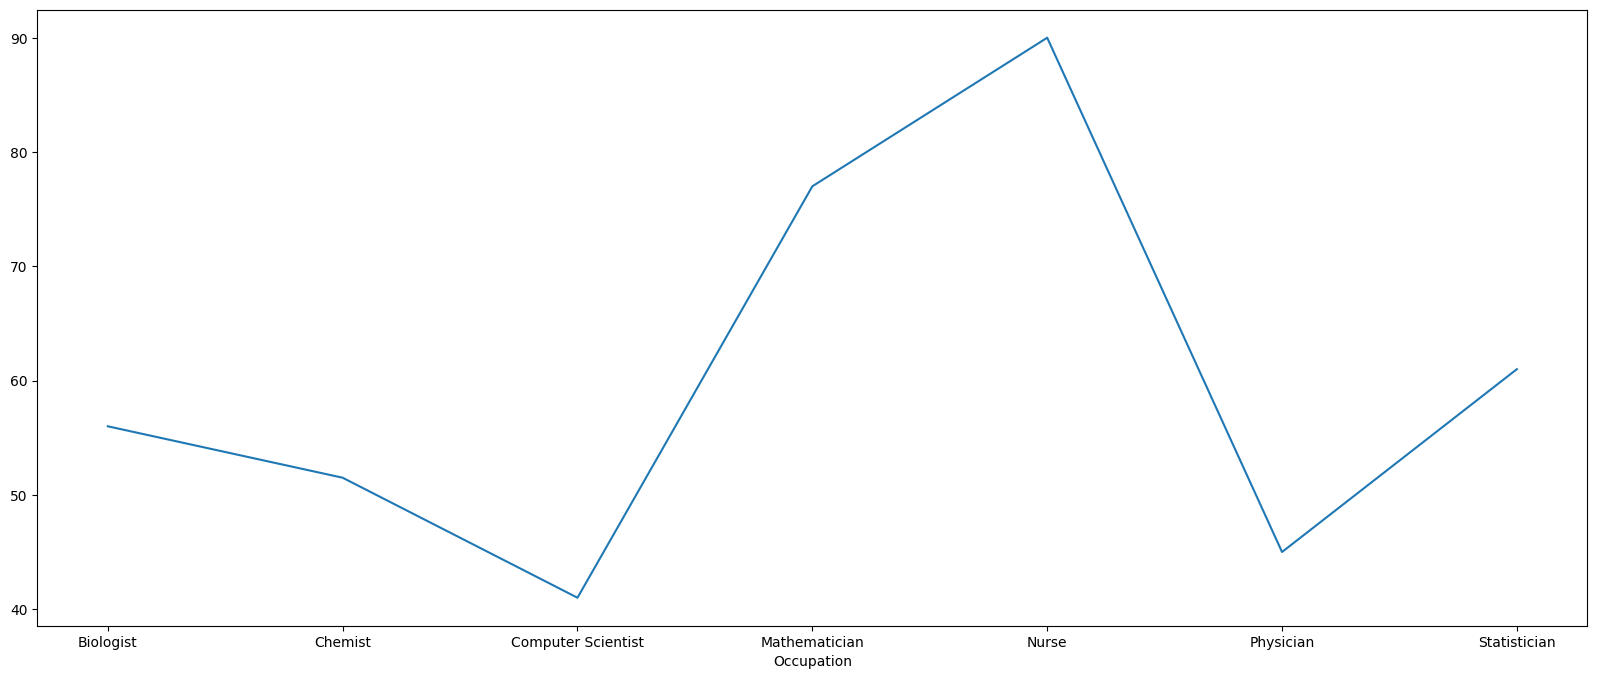

In [38]:
# 绘图
scientists_avg_age_by_occupation.plot(figsize=(20, 8))